In [30]:
!pip install sqlalchemy pandas matplotlib seaborn mysql-connector-python

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import numpy as np
from sqlalchemy import create_engine

In [32]:
# Подключение к базе данных
DB_USER = 'mgpu_ico_etl_12'
DB_PASSWORD = 'taJlo3z4'
DB_HOST = '95.131.149.21'
DB_NAME = 'mgpu_ico_etl_12'

engine = create_engine(f'mysql+mysqlconnector://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_NAME}')

# Проверка подключения
try:
    with engine.connect() as conn:
        print("Успешное подключение к MySQL")
except Exception as e:
    print(f"Ошибка подключения: {e}")
    exit()

Успешное подключение к MySQL


/tmp/ipython-input-3464849595.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=yearly_profit, x='year', y='total_profit', ax=ax1, palette='Blues_d')
/tmp/ipython-input-3464849595.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=category_margin, x='category', y='avg_margin',
/tmp/ipython-input-3464849595.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(category_margin['category'], rotation=45, ha='right', fontsize=10)
/tmp/ipython-input-3464849595.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.

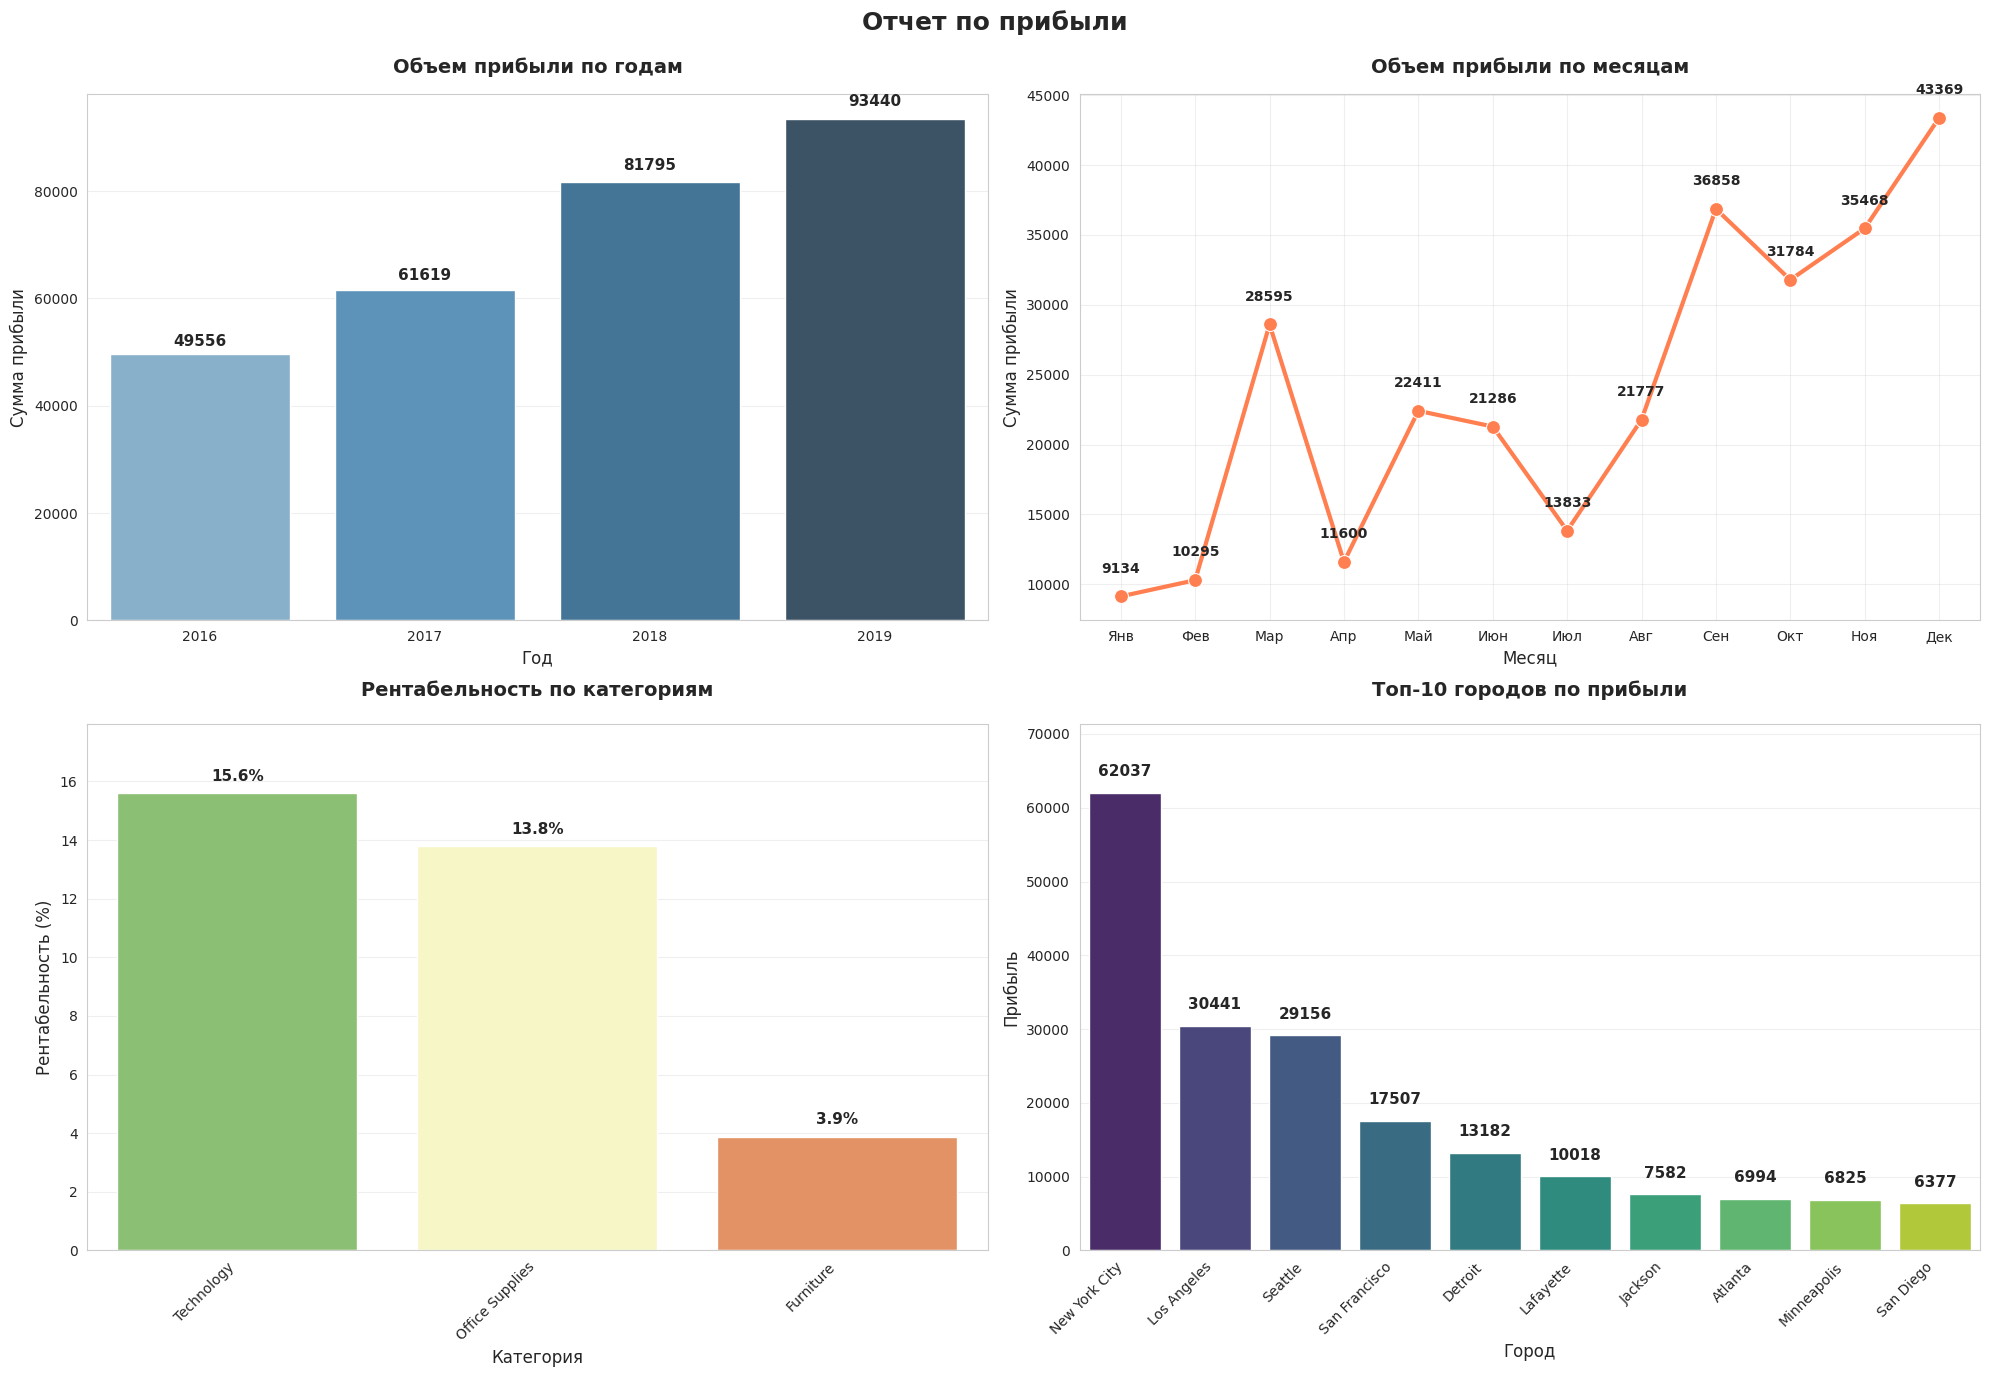

In [22]:
# Настройка стиля для графиков
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (20, 14)

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Отчет по прибыли', fontsize=18, fontweight='bold', y=0.98)

# График № 1
ax1 = axes[0, 0]

yearly_query = """
SELECT year, SUM(profit) as total_profit
FROM profit_report
GROUP BY year
ORDER BY year
"""
yearly_profit = pd.read_sql(yearly_query, engine)

bars = sns.barplot(data=yearly_profit, x='year', y='total_profit', ax=ax1, palette='Blues_d')
ax1.set_title('Объем прибыли по годам', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Год', fontsize=12)
ax1.set_ylabel('Сумма прибыли', fontsize=12)

for i, row in yearly_profit.iterrows():
    ax1.text(i, row['total_profit'] + (row['total_profit'] * 0.02),
            f"{row['total_profit']:.0f}",
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax1.grid(axis='y', alpha=0.3)

# График № 2
ax2 = axes[0, 1]

monthly_query = """
SELECT month, SUM(profit) as total_profit
FROM profit_report
GROUP BY month
ORDER BY month
"""
monthly_profit = pd.read_sql(monthly_query, engine)

month_names = {
    1: 'Янв', 2: 'Фев', 3: 'Мар', 4: 'Апр',
    5: 'Май', 6: 'Июн', 7: 'Июл', 8: 'Авг',
    9: 'Сен', 10: 'Окт', 11: 'Ноя', 12: 'Дек'
}
monthly_profit['month_name'] = monthly_profit['month'].map(month_names)

line = sns.lineplot(data=monthly_profit, x='month', y='total_profit',
                    marker='o', linewidth=3, markersize=10, color='coral', ax=ax2)
ax2.set_title('Объем прибыли по месяцам', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Месяц', fontsize=12)
ax2.set_ylabel('Сумма прибыли', fontsize=12)
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels([month_names[i] for i in range(1, 13)], rotation=0)
ax2.grid(True, alpha=0.3)

for i, row in monthly_profit.iterrows():
    ax2.annotate(f"{row['total_profit']:.0f}",
                xy=(row['month'], row['total_profit']),
                xytext=(0, 15),
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

# График № 3
ax3 = axes[1, 0]

category_query = """
SELECT category, AVG(profit_margin) as avg_margin
FROM profit_report
GROUP BY category
ORDER BY avg_margin DESC
"""
category_margin = pd.read_sql(category_query, engine)

category_margin = category_margin.sort_values('avg_margin', ascending=False)

bars = sns.barplot(data=category_margin, x='category', y='avg_margin',
                  ax=ax3, palette='RdYlGn_r')
ax3.set_title('Рентабельность по категориям', fontsize=14, fontweight='bold', pad=20)
ax3.set_xlabel('Категория', fontsize=12)
ax3.set_ylabel('Рентабельность (%)', fontsize=12)
ax3.set_xticklabels(category_margin['category'], rotation=45, ha='right', fontsize=10)

max_margin = category_margin['avg_margin'].max()
for i, row in category_margin.iterrows():
    ax3.text(i, row['avg_margin'] + (max_margin * 0.02),
            f"{row['avg_margin']:.1f}%",
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax3.set_ylim(0, max_margin * 1.15)
ax3.grid(axis='y', alpha=0.3)

# График № 4
ax4 = axes[1, 1]

city_query = """
SELECT city, SUM(profit) as total_profit
FROM profit_report
GROUP BY city
ORDER BY total_profit DESC
LIMIT 10
"""
city_profit = pd.read_sql(city_query, engine)

bars = sns.barplot(data=city_profit, x='city', y='total_profit',
                   ax=ax4, palette='viridis')
ax4.set_title('Топ-10 городов по прибыли', fontsize=14, fontweight='bold', pad=20)
ax4.set_xlabel('Город', fontsize=12)
ax4.set_ylabel('Прибыль', fontsize=12)
ax4.set_xticklabels(city_profit['city'], rotation=45, ha='right', fontsize=10)

max_profit = city_profit['total_profit'].max()
for i, row in city_profit.iterrows():
    ax4.text(i, row['total_profit'] + (max_profit * 0.03),
            f"{row['total_profit']:.0f}",
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax4.set_ylim(0, max_profit * 1.15)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.92)

plt.show()

/tmp/ipython-input-4153513165.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=days_sales, x='day_name', y='total_sales', ax=ax1, palette='viridis')
/tmp/ipython-input-4153513165.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=top_products, x='product_name_short', y='total_sales',
/tmp/ipython-input-4153513165.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(top_products['product_name_short'], rotation=45, ha='right', fontsize=10)
/tmp/ipython-input-4153513165.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

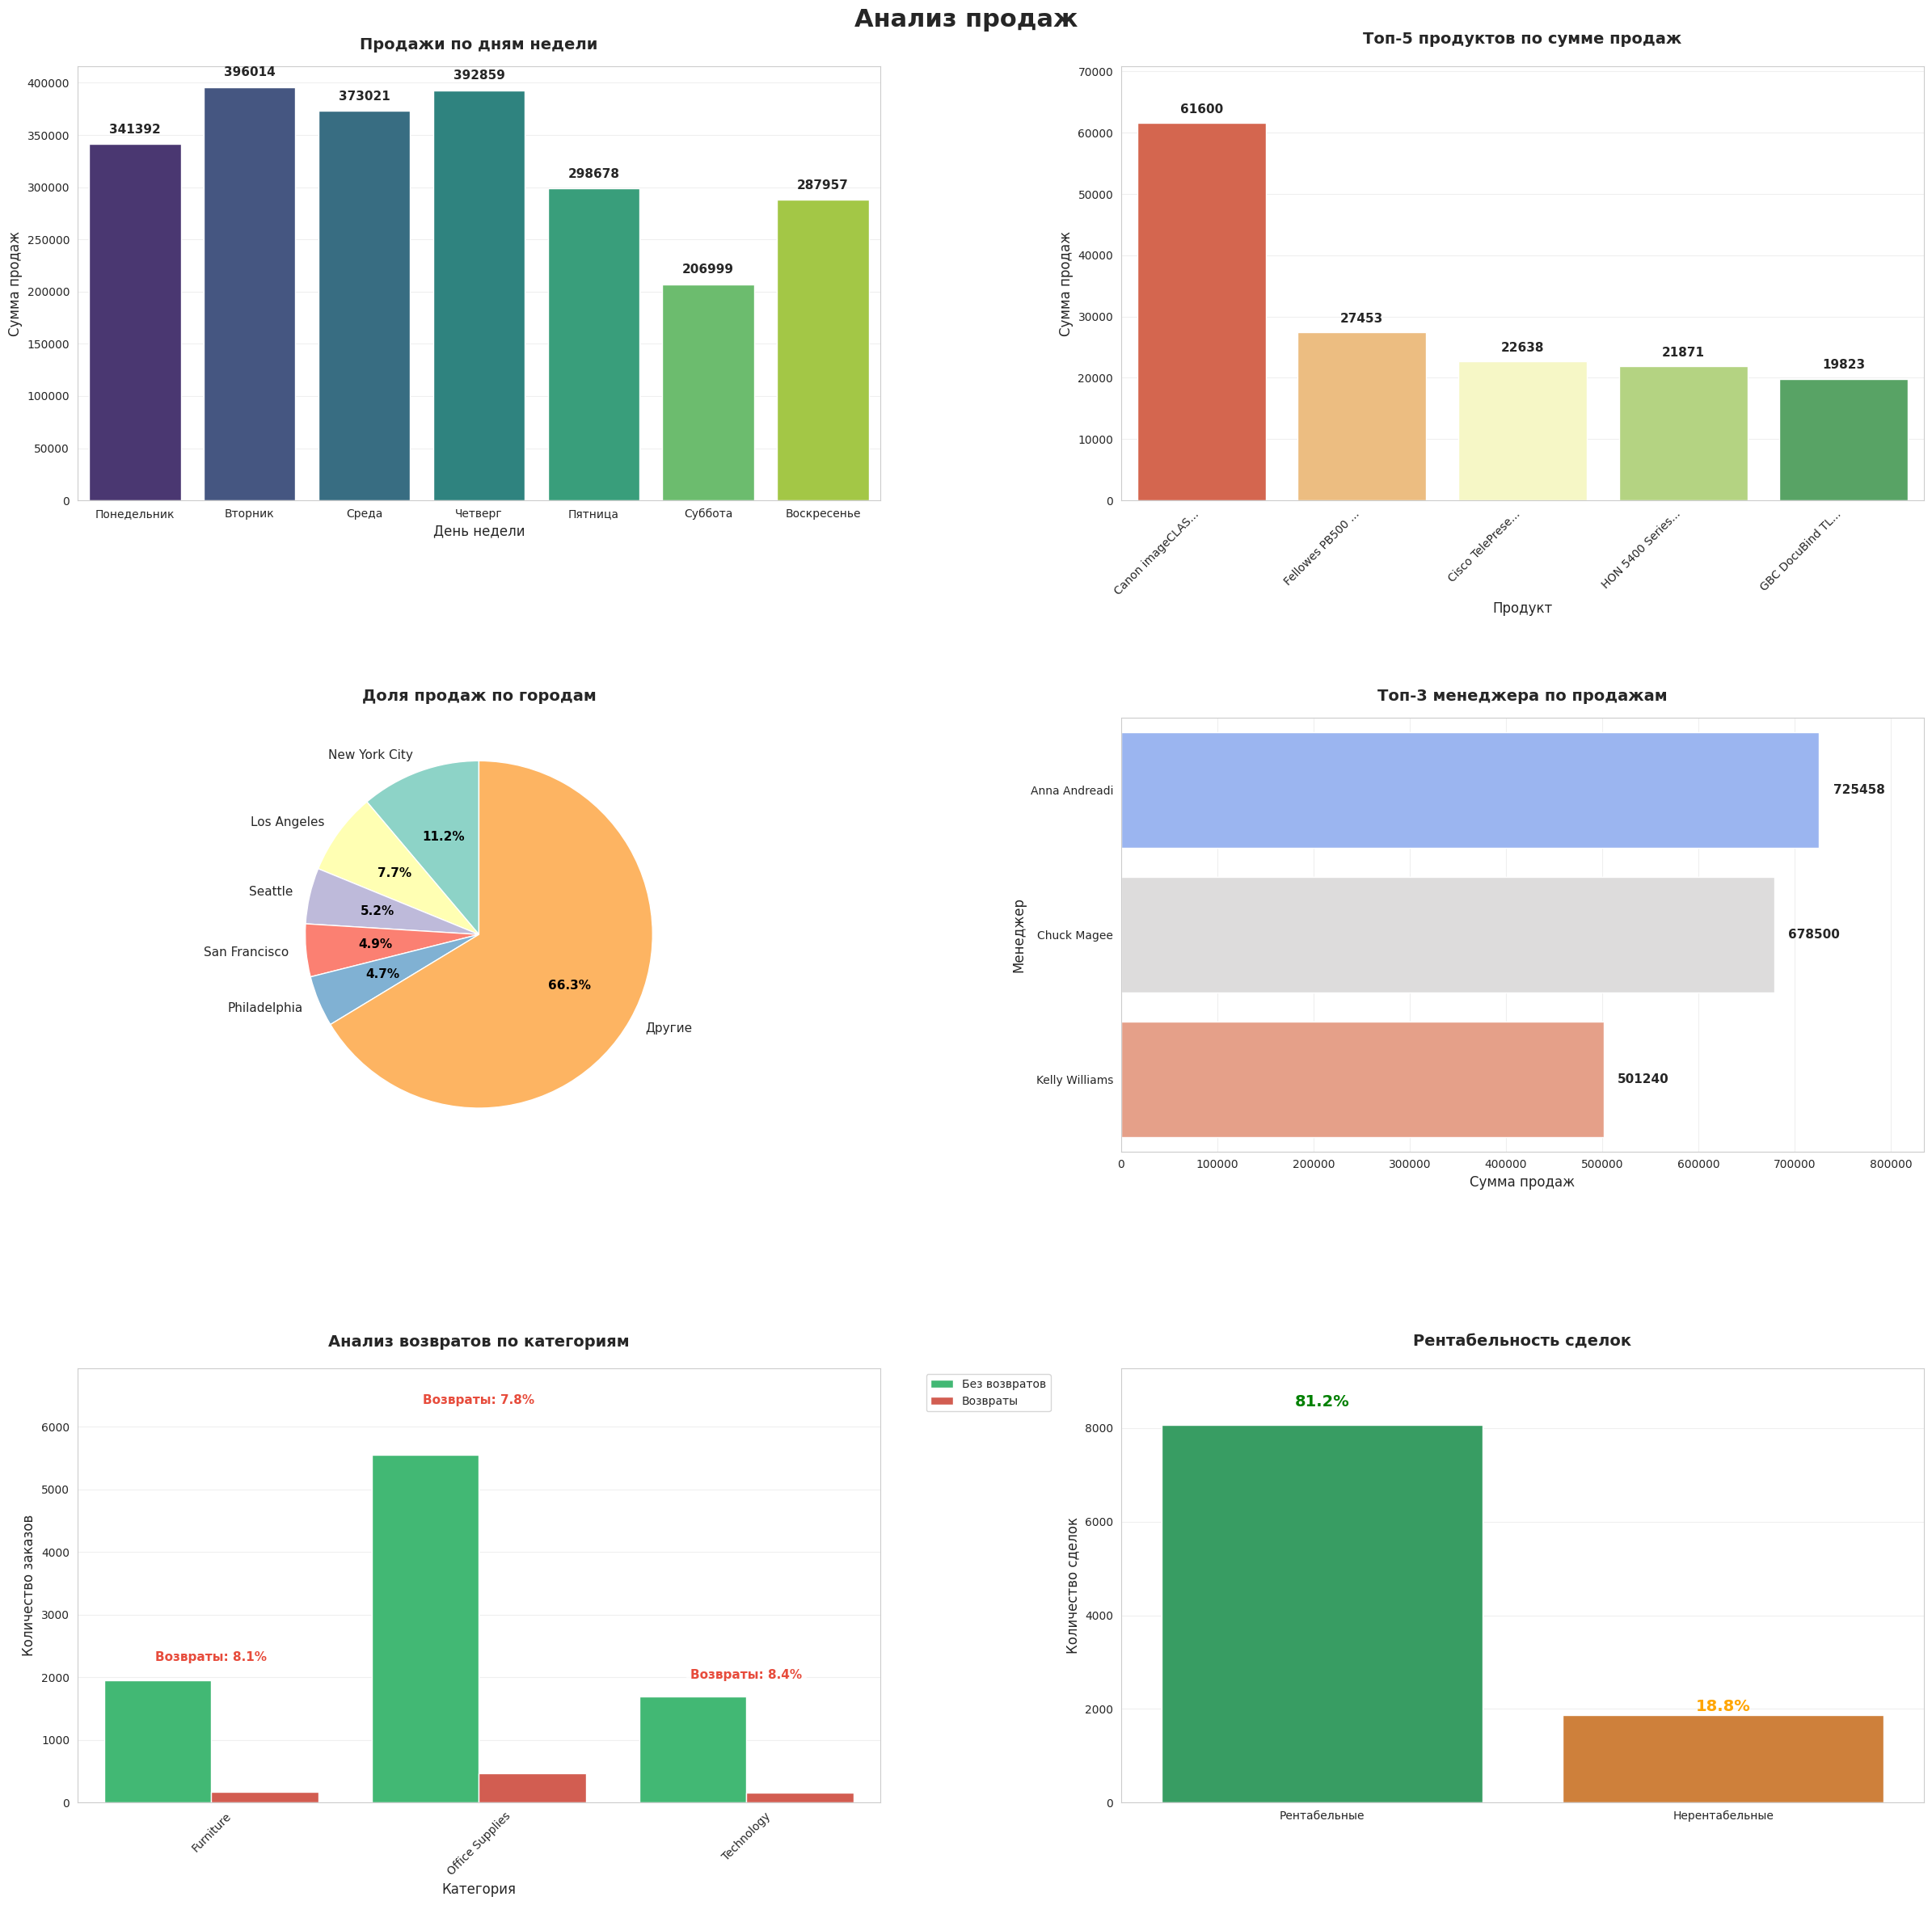

In [33]:
# Настройка стиля для графиков
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (24, 24)

fig, axes = plt.subplots(3, 2, figsize=(24, 24))
fig.suptitle('Анализ продаж', fontsize=22, fontweight='bold', y=0.98)

# Функция для того, чтобы обрезать длинные названия в product_name
def truncate_name(name, max_length=15):
    if len(str(name)) > max_length:
        return str(name)[:max_length] + '...'
    return str(name)

# График № 1
ax1 = axes[0, 0]

days_query = """
SELECT day_of_week, SUM(sales) as total_sales
FROM sales_analysis
GROUP BY day_of_week
ORDER BY day_of_week
"""
days_sales = pd.read_sql(days_query, engine)

day_names = {
    1: 'Понедельник', 2: 'Вторник', 3: 'Среда', 4: 'Четверг',
    5: 'Пятница', 6: 'Суббота', 7: 'Воскресенье'
}
days_sales['day_name'] = days_sales['day_of_week'].map(day_names)

bars = sns.barplot(data=days_sales, x='day_name', y='total_sales', ax=ax1, palette='viridis')
ax1.set_title('Продажи по дням недели', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('День недели', fontsize=12)
ax1.set_ylabel('Сумма продаж', fontsize=12)

max_sales = days_sales['total_sales'].max()
for i, row in days_sales.iterrows():
    ax1.text(i, row['total_sales'] + (max_sales * 0.02),
            f"{row['total_sales']:.0f}",
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax1.grid(axis='y', alpha=0.3)

# График № 2
ax2 = axes[0, 1]

top_products_query = """
SELECT product_name, SUM(sales) as total_sales
FROM sales_analysis
GROUP BY product_name
ORDER BY total_sales DESC
LIMIT 5
"""
top_products = pd.read_sql(top_products_query, engine)

# Обрезаем длинные названия товаров
top_products['product_name_short'] = top_products['product_name'].apply(truncate_name)

bars = sns.barplot(data=top_products, x='product_name_short', y='total_sales',
                  ax=ax2, palette='RdYlGn')
ax2.set_title('Топ-5 продуктов по сумме продаж', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Продукт', fontsize=12)
ax2.set_ylabel('Сумма продаж', fontsize=12)
ax2.set_xticklabels(top_products['product_name_short'], rotation=45, ha='right', fontsize=10)

max_sales_prod = top_products['total_sales'].max()
for i, row in top_products.iterrows():
    ax2.text(i, row['total_sales'] + (max_sales_prod * 0.02),
            f"{row['total_sales']:.0f}",
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.set_ylim(0, max_sales_prod * 1.15)
ax2.grid(axis='y', alpha=0.3)

# График № 3
ax3 = axes[1, 0]

city_sales_query = """
SELECT city, SUM(sales) as total_sales
FROM sales_analysis
GROUP BY city
ORDER BY total_sales DESC
"""
city_sales = pd.read_sql(city_sales_query, engine)

if len(city_sales) > 5:
    top_cities = city_sales.head(5)
    other_sales = city_sales.iloc[5:]['total_sales'].sum()
    other_row = pd.DataFrame({'city': ['Другие'], 'total_sales': [other_sales]})
    pie_data = pd.concat([top_cities, other_row], ignore_index=True)
else:
    pie_data = city_sales

wedges, texts, autotexts = ax3.pie(pie_data['total_sales'],
                                    labels=pie_data['city'],
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=sns.color_palette('Set3', len(pie_data)))
ax3.set_title('Доля продаж по городам', fontsize=14, fontweight='bold', pad=15)

for text in texts:
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_color('black')
    autotext.set_weight('bold')

# График № 4 - ИСПРАВЛЕН (Топ-3 менеджера)
ax4 = axes[1, 1]

top_managers_query = """
SELECT person, SUM(sales) as total_sales
FROM sales_analysis
WHERE person IS NOT NULL AND person != ''
GROUP BY person
ORDER BY total_sales DESC
LIMIT 3
"""
top_managers = pd.read_sql(top_managers_query, engine)

bars = sns.barplot(data=top_managers, y='person', x='total_sales',
                  ax=ax4, palette='coolwarm', orient='h')
ax4.set_title('Топ-3 менеджера по продажам', fontsize=14, fontweight='bold', pad=15)
ax4.set_xlabel('Сумма продаж', fontsize=12)
ax4.set_ylabel('Менеджер', fontsize=12)

max_manager = top_managers['total_sales'].max()
for i, row in top_managers.iterrows():
    ax4.text(row['total_sales'] + (max_manager * 0.02), i,
            f"{row['total_sales']:.0f}",
            va='center', fontsize=11, fontweight='bold')

ax4.set_xlim(0, max_manager * 1.15)
ax4.grid(axis='x', alpha=0.3)

# График № 5 - ИСПРАВЛЕН (Процент возвратов над столбцами)
ax5 = axes[2, 0]

returns_query = """
SELECT
    category,
    COUNT(*) as total_orders,
    SUM(CASE WHEN returned = 1 OR returned = 'Yes' THEN 1 ELSE 0 END) as returns_count
FROM sales_analysis
GROUP BY category
ORDER BY category
"""
returns_data = pd.read_sql(returns_query, engine)

# Расчет процента возвратов
returns_data['return_percent'] = (returns_data['returns_count'] / returns_data['total_orders'] * 100).round(1)
returns_data['non_returns_count'] = returns_data['total_orders'] - returns_data['returns_count']

returns_melted = pd.melt(returns_data,
                         id_vars=['category', 'return_percent'],
                         value_vars=['non_returns_count', 'returns_count'],
                         var_name='type',
                         value_name='count')

returns_melted['type'] = returns_melted['type'].map({
    'non_returns_count': 'Без возвратов',
    'returns_count': 'Возвраты'
})

# Сортируем для правильного порядка
returns_melted = returns_melted.sort_values(['category', 'type'])

bars = sns.barplot(data=returns_melted, x='category', y='count',
                   hue='type', ax=ax5, palette=['#2ecc71', '#e74c3c'])
ax5.set_title('Анализ возвратов по категориям', fontsize=14, fontweight='bold', pad=20)
ax5.set_xlabel('Категория', fontsize=12)
ax5.set_ylabel('Количество заказов', fontsize=12)
ax5.tick_params(axis='x', rotation=45)
ax5.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
ax5.grid(axis='y', alpha=0.3)

# Добавляем проценты возвратов над каждым столбцом
for i, category in enumerate(returns_data['category']):
    return_pct = returns_data[returns_data['category'] == category]['return_percent'].iloc[0]
    total = returns_data[returns_data['category'] == category]['total_orders'].iloc[0]

    # Позиция для текста (над самым высоким столбцом в группе)
    ax5.text(i, total + (total * 0.05),
            f"Возвраты: {return_pct}%",
            ha='center', va='bottom', fontsize=11, fontweight='bold',
            color='#e74c3c', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax5.set_ylim(0, returns_data['total_orders'].max() * 1.15)

# График № 6
ax6 = axes[2, 1]

profitability_query = """
SELECT
    SUM(CASE WHEN profit > 0 THEN 1 ELSE 0 END) as profitable_count,
    SUM(CASE WHEN profit < 0 THEN 1 ELSE 0 END) as unprofitable_count
FROM sales_analysis
"""
profitability_data = pd.read_sql(profitability_query, engine)

prof_data = pd.DataFrame({
    'Тип': ['Рентабельные', 'Нерентабельные'],
    'Количество': [profitability_data['profitable_count'].iloc[0],
                   profitability_data['unprofitable_count'].iloc[0]]
})

bars = sns.barplot(data=prof_data, x='Тип', y='Количество',
                  ax=ax6, palette=['#27ae60', '#e67e22'])
ax6.set_title('Рентабельность сделок', fontsize=14, fontweight='bold', pad=20)
ax6.set_xlabel('', fontsize=12)
ax6.set_ylabel('Количество сделок', fontsize=12)

total = prof_data['Количество'].sum()
if total > 0:
    profitable_pct = (prof_data.loc[0, 'Количество'] / total * 100)
    unprofitable_pct = (prof_data.loc[1, 'Количество'] / total * 100)

    ax6.text(0, prof_data.loc[0, 'Количество'] + (prof_data.loc[0, 'Количество'] * 0.05),
            f"{profitable_pct:.1f}%",
            ha='center', fontsize=14, color='green', fontweight='bold')

    ax6.text(1, prof_data.loc[1, 'Количество'] + (prof_data.loc[1, 'Количество'] * 0.05),
            f"{unprofitable_pct:.1f}%",
            ha='center', fontsize=14, color='orange', fontweight='bold')

ax6.set_ylim(0, max(prof_data['Количество']) * 1.15)
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.5, wspace=0.3)

plt.show()

In [29]:
# Закрываем соединение
engine.dispose()
print("\n Соединение с базой данных закрыто")


 Соединение с базой данных закрыто
